# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [14]:
df_normalized = pd.read_csv("/content/drive/MyDrive/Clustering Classification/hasil_cluster.csv")
df_normalized.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Lead Time,Lead Time Binned,Cluster,Cluster_Selected,Ship Mode_original,Region_original,Segment_original,Category_original,Sub-Category_original,Lead Time Binned_original
0,1,CA-2017-152156,2017-11-08,2017-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,...,3.0,0,0,0,Second Class,South,Consumer,Furniture,Bookcases,Cepat
1,2,CA-2017-152156,2017-11-08,2017-11-11,2,CG-12520,Claire Gute,0,United States,Henderson,...,3.0,0,0,0,Second Class,South,Consumer,Furniture,Chairs,Cepat
2,3,CA-2017-138688,2017-06-12,2017-06-16,2,DV-13045,Darrin Van Huff,1,United States,Los Angeles,...,4.0,0,1,1,Second Class,West,Corporate,Office Supplies,Labels,Cepat
3,4,US-2016-108966,2016-10-11,2016-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,7.0,1,1,1,Standard Class,South,Consumer,Furniture,Tables,Lambat
4,5,US-2016-108966,2016-10-11,2016-10-18,3,SO-20335,Sean O'Donnell,0,United States,Fort Lauderdale,...,7.0,1,1,1,Standard Class,South,Consumer,Office Supplies,Storage,Lambat


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [20]:

X = df_normalized[['Ship Mode', 'Segment', 'Region', 'Cluster']]
y = df_normalized['Lead Time Binned_original']

# encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [21]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)
y_pred = rf_model.predict(X_test_scaled)


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Hasil Evaluasi Model Klasifikasi
Akurasi (Accuracy)   : 0.7211
F1-Score             : 0.7213
Presisi (Precision)  : 0.7735
Recall               : 0.7211

Classification Report:
              precision    recall  f1-score   support

       Cepat       0.89      0.61      0.72      1164
      Lambat       0.61      0.89      0.72       794

    accuracy                           0.72      1958
   macro avg       0.75      0.75      0.72      1958
weighted avg       0.77      0.72      0.72      1958



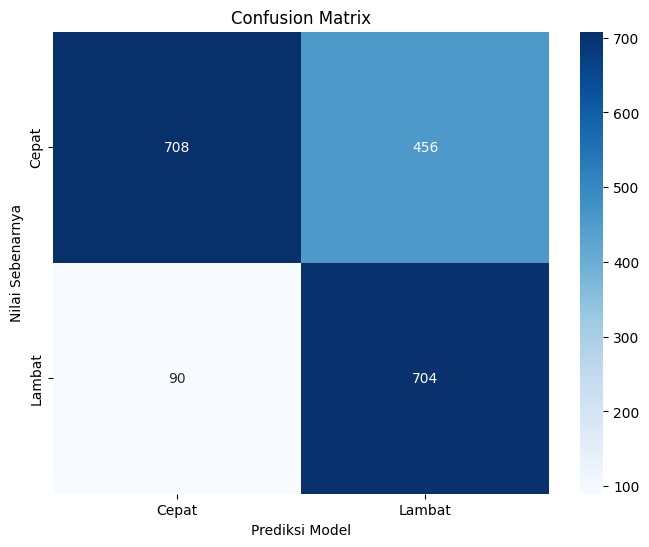

In [24]:
y_pred = best_rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("==============================================")
print("Hasil Evaluasi Model Klasifikasi")
print("==============================================")
print(f"Akurasi (Accuracy)   : {accuracy:.4f}")
print(f"F1-Score             : {f1:.4f}")
print(f"Presisi (Precision)  : {precision:.4f}")
print(f"Recall               : {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Cepat', 'Lambat'],
            yticklabels=['Cepat', 'Lambat'])

plt.xlabel('Prediksi Model')
plt.ylabel('Nilai Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [11]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test_scaled)

print("Best Hyperparameters:\n", grid_search.best_params_)

Best Hyperparameters:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Hasil Evaluasi Model Setelah Tuning
Akurasi: 0.7211
F1-Score: 0.7213
Presisi: 0.7735
Recall: 0.7211


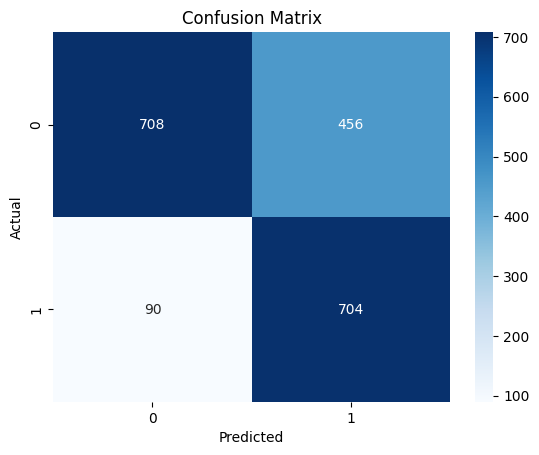

In [27]:
# hitung metrik
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# tampilkan hasil
print("=====================================================")
print("Hasil Evaluasi Model Setelah Tuning")
print("=====================================================")
print(f"Akurasi: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.